In [26]:
{1:1,2:3}.values()

dict_values([1, 3])

In [23]:
import matplotlib.pyplot as plt
import math
import numpy as np

def calc_yfa(z, beta) -> float:
    denominator = math.cos(beta) ** 3
    if denominator == 0:
        return 0.0  # 防止分母为零的情况，具体处理需根据实际需求调整
    zv = z / denominator
    if zv < 35:
        term = (zv - 16) / (math.cos(beta) ** 3)
        return (-0.0000570752776635208 * (term ** 3) +
                0.00307677616500968 * (term ** 2) -
                0.0688841305752419 * term +
                3.03422577422526)
    if zv < 110:
        term = (zv / 10 - 2) / (math.cos(beta) ** 3)
        return (-0.00141414141414042 * (term ** 3) +
                0.0267099567099223 * (term ** 2) -
                0.18568542568536 * term +
                2.6785714285711)
    if zv < 160:
        return 2.14
    if zv < 210:
        return 2.12
    return 2.1


def calc_ysa(z, beta) -> float:
    if z < 35:
        term = (z - 16) / (math.cos(beta) ** 3)
        return (0.0000291375291376905 * (term ** 3) -
                0.00079295704295923 * (term ** 2) +
                0.0139880952381617 * term +
                1.50570429570396)
    if z < 130:
        term = (z / 10 - 2) / (math.cos(beta) ** 3)
        return (-0.0027083333 * (term ** 2) +
                0.0474107143 * term +
                1.5825892857)
    if z < 160:
        return 1.83
    if z < 210:
        return 1.865
    return 1.9
    
def calc_yf(z, beta):
    return calc_yfa(z, beta) * calc_ysa(z, beta)


In [25]:
calc_yf(22, 12 / 180 * math.pi)

4.162005595774217

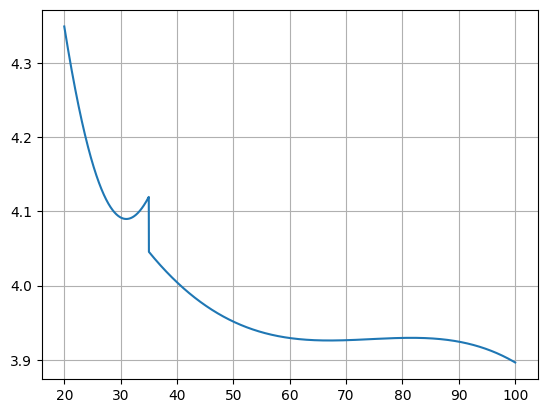

In [24]:
z = np.linspace(20, 100, 10000)
beta = 0
yf = [calc_yf(zi, beta) for zi in z]
plt.plot(z, yf)
plt.grid()
plt.show()

In [3]:
print(rf'$\sigma_H_{{{1 + 1}}}$')

$\sigma_H_{2}$


In [4]:
import scipy.optimize as opt
import math

In [7]:
i_total = 10
coeff = 1

def func(iI: float):
    return coeff * (iI + 1) * iI ** 4 / ((iI + i_total) * i_total ** 2)
opt.fsolve(lambda x: func(x) - 1, 4)

array([4.0802046])

In [2]:
(2*(2.5)**2)**(1/3)

2.320794416806389

In [16]:
import pyautocad
from pyautocad import APoint

In [13]:
acad = pyautocad.Autocad(create_if_not_exists=True)
acad.prompt("Hello, Autocad from Python\n")

Hello, Autocad from Python



In [14]:
print(acad.doc.Name)

Drawing1.dwg


In [18]:
# simple line
acad.model.AddLine(APoint(0, 0), APoint(10, 10))

In [20]:
acad.ActiveDocument.SendCommand("circle\n0,0\n10\n")